<a href="https://colab.research.google.com/github/Tapr16/nba-netrating-regression/blob/main/Proyecto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final IA


![Texto alternativo](https://raw.githubusercontent.com/Tapr16/nba-netrating-regression/main/Banner-IA.jpg)


## Integrantes
- Thomas Perez - 2221906
- Jose Meneses - 2221900
- Roger Fuentes - 2221890

#Primera entrega proyecto IA

## Importaciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
url = "https://raw.githubusercontent.com/Tapr16/nba-datasets/refs/heads/main/Team%20Summaries(2015-2025).csv"
dataset = pd.read_csv(url)

In [3]:
print(dataset.dtypes)

season                int64
lg                   object
team                 object
abbreviation         object
playoffs               bool
age                 float64
w                   float64
l                   float64
pw                    int64
pl                    int64
mov                 float64
sos                 float64
srs                 float64
o_rtg               float64
d_rtg               float64
n_rtg               float64
pace                float64
f_tr                float64
x3p_ar              float64
ts_percent          float64
e_fg_percent        float64
tov_percent         float64
orb_percent         float64
ft_fga              float64
opp_e_fg_percent    float64
opp_tov_percent     float64
drb_percent         float64
opp_ft_fga          float64
arena                object
attend              float64
attend_g            float64
dtype: object


## Info Dataset

In [4]:
print("Columns and shape:", dataset.columns, dataset.shape)

Columns and shape: Index(['season', 'lg', 'team', 'abbreviation', 'playoffs', 'age', 'w', 'l',
       'pw', 'pl', 'mov', 'sos', 'srs', 'o_rtg', 'd_rtg', 'n_rtg', 'pace',
       'f_tr', 'x3p_ar', 'ts_percent', 'e_fg_percent', 'tov_percent',
       'orb_percent', 'ft_fga', 'opp_e_fg_percent', 'opp_tov_percent',
       'drb_percent', 'opp_ft_fga', 'arena', 'attend', 'attend_g'],
      dtype='object') (341, 31)


In [5]:
print("Describe:", dataset.describe)

Describe: <bound method NDFrame.describe of      season   lg                team abbreviation  playoffs   age     w     l  \
0      2025  NBA       Atlanta Hawks          ATL      True  24.9  40.0  42.0   
1      2025  NBA      Boston Celtics          BOS      True  28.9  61.0  21.0   
2      2025  NBA       Brooklyn Nets          BRK     False  24.7  26.0  56.0   
3      2025  NBA       Chicago Bulls          CHI      True  25.2  39.0  43.0   
4      2025  NBA   Charlotte Hornets          CHO     False  25.1  19.0  63.0   
..      ...  ...                 ...          ...       ...   ...   ...   ...   
336    2015  NBA   San Antonio Spurs          SAS      True  29.8  55.0  27.0   
337    2015  NBA     Toronto Raptors          TOR      True  26.1  49.0  33.0   
338    2015  NBA           Utah Jazz          UTA     False  23.4  38.0  44.0   
339    2015  NBA  Washington Wizards          WAS      True  28.6  46.0  36.0   
340    2015  NBA      League Average          NaN     False  26.8

In [6]:
print("---------------- \n Display data \n---------------")
dataset.head()

---------------- 
 Display data 
---------------


,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,drb_percent,opp_ft_fga,arena,attend,attend_g
0,2025,NBA,Atlanta Hawks,ATL,True,24.9,40.0,42.0,38,44,...,13.2,26.3,0.196,0.560,13.8,76.0,0.202,State Farm Arena,657613.0,16440.0
1,2025,NBA,Boston Celtics,BOS,True,28.9,61.0,21.0,62,20,...,10.8,25.7,0.169,0.522,11.6,76.0,0.154,TD Garden,785396.0,19156.0
2,2025,NBA,Brooklyn Nets,BRK,False,24.7,26.0,56.0,23,59,...,13.7,24.5,0.189,0.557,13.7,75.0,0.218,Barclays Center,713304.0,17398.0
3,2025,NBA,Chicago Bulls,CHI,True,25.2,39.0,43.0,37,45,...,12.7,22.3,0.173,0.539,10.8,76.6,0.178,United Center,825659.0,20138.0
4,2025,NBA,Charlotte Hornets,CHO,False,25.1,19.0,63.0,20,62,...,13.7,26.5,0.174,0.547,11.9,74.5,0.190,Spectrum Center,703935.0,17169.0


In [7]:
dataset.drop(['lg', 'abbreviation', 'arena', 'attend', 'attend_g'], axis=1, inplace=True)

In [8]:
print("---------------- \n Display data \n---------------")
dataset.head()

---------------- 
 Display data 
---------------


,season,team,playoffs,age,w,l,pw,pl,mov,sos,...,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,drb_percent,opp_ft_fga
0,2025,Atlanta Hawks,True,24.9,40.0,42.0,38,44,-1.13,-0.28,...,0.410,0.579,0.546,13.2,26.3,0.196,0.560,13.8,76.0,0.202
1,2025,Boston Celtics,True,28.9,61.0,21.0,62,20,9.11,-0.83,...,0.536,0.591,0.561,10.8,25.7,0.169,0.522,11.6,76.0,0.154
2,2025,Brooklyn Nets,False,24.7,26.0,56.0,23,59,-7.11,0.16,...,0.458,0.552,0.516,13.7,24.5,0.189,0.557,13.7,75.0,0.218
3,2025,Chicago Bulls,True,25.2,39.0,43.0,37,45,-1.56,-0.27,...,0.457,0.585,0.553,12.7,22.3,0.173,0.539,10.8,76.6,0.178
4,2025,Charlotte Hornets,False,25.1,19.0,63.0,20,62,-9.11,0.01,...,0.430,0.537,0.503,13.7,26.5,0.174,0.547,11.9,74.5,0.190


## Limpieza nulos


In [9]:
dataset.isnull().sum()

,0
season,0
team,0
playoffs,0
age,0
w,11
l,11
pw,0
pl,0
mov,0
sos,0


In [10]:
# Wins y Losses para cada año
dataset.loc[(dataset['team'] == 'League Average') & (dataset['season'].isin([2015, 2016, 2017, 2018, 2019, 2022, 2023, 2024, 2025])), ['w', 'l']] = 41
dataset.loc[(dataset['team'] == 'League Average') & (dataset['season'] == 2021), ['w', 'l']] = 36
dataset.loc[(dataset['team'] == 'League Average') & (dataset['season'] == 2020), ['w', 'l']] = 35

# Net rating
dataset.loc[dataset['team'] == 'League Average', 'n_rtg'] = 0

In [11]:
display(dataset[dataset.isnull().any(axis=1)])

,season,team,playoffs,age,w,l,pw,pl,mov,sos,...,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,drb_percent,opp_ft_fga


## Graficas Numericas

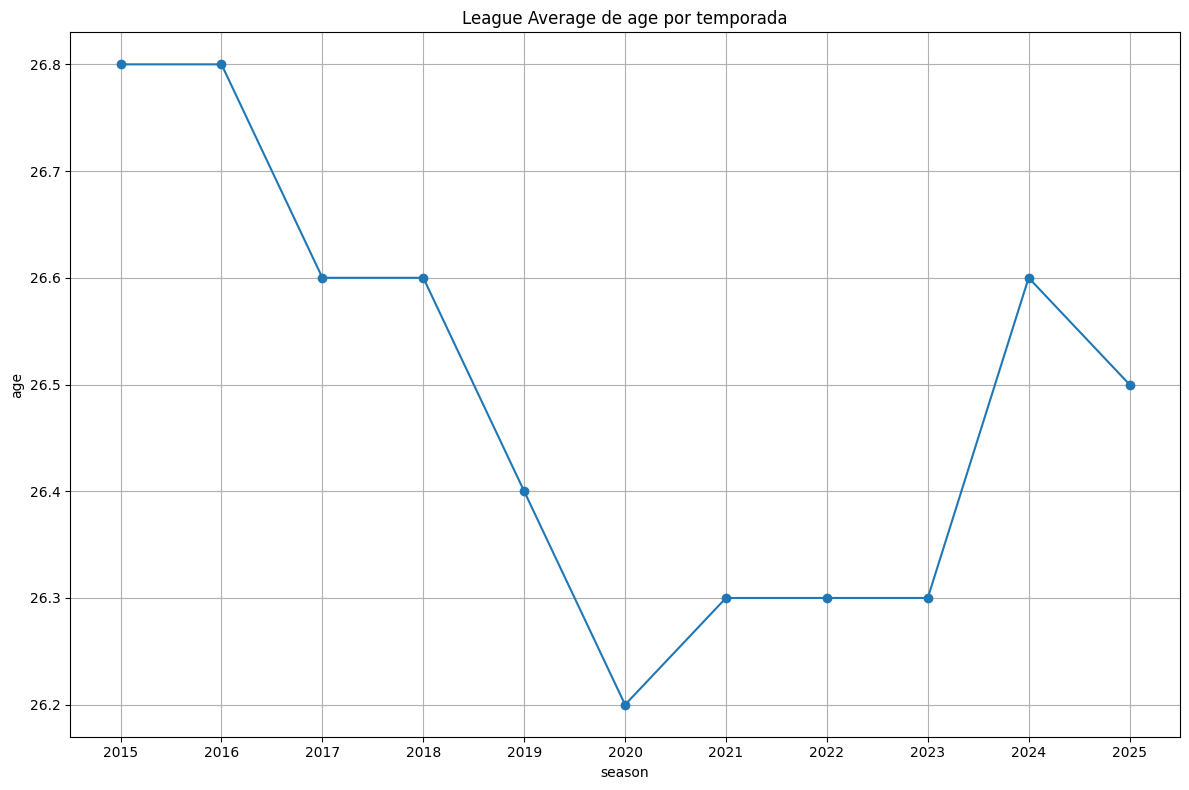

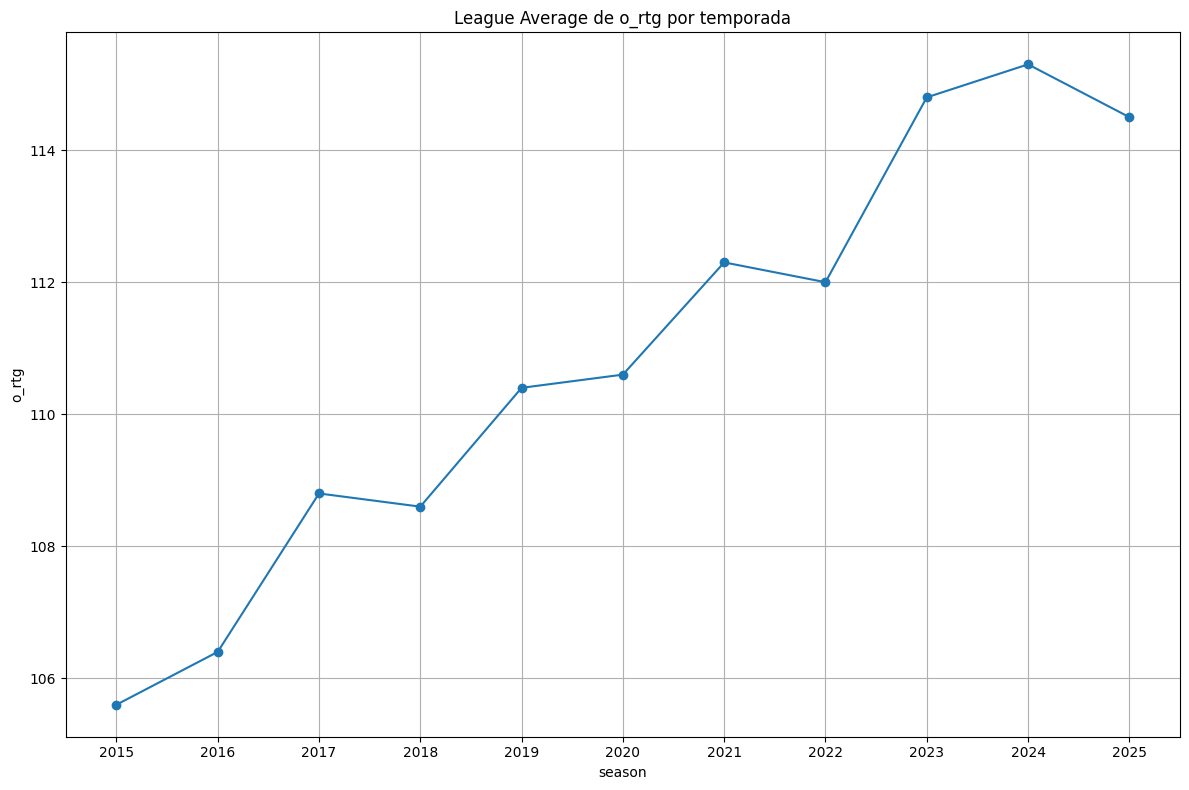

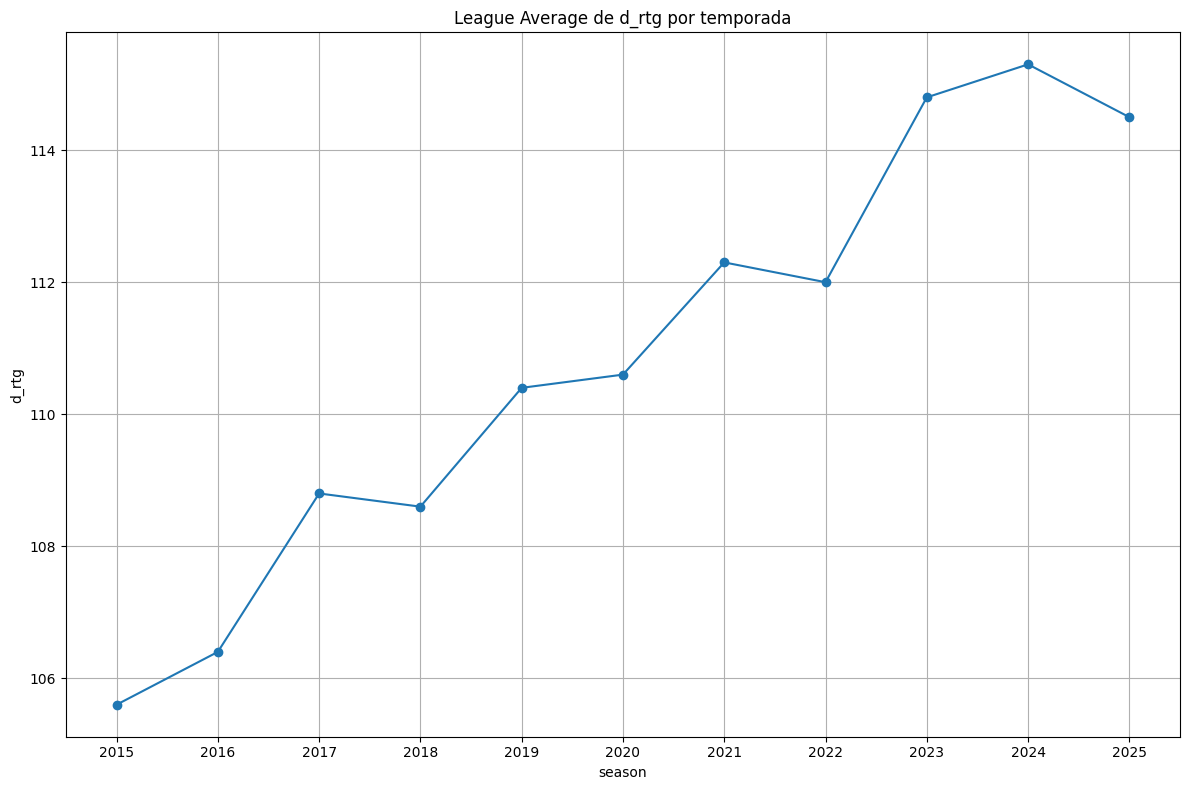

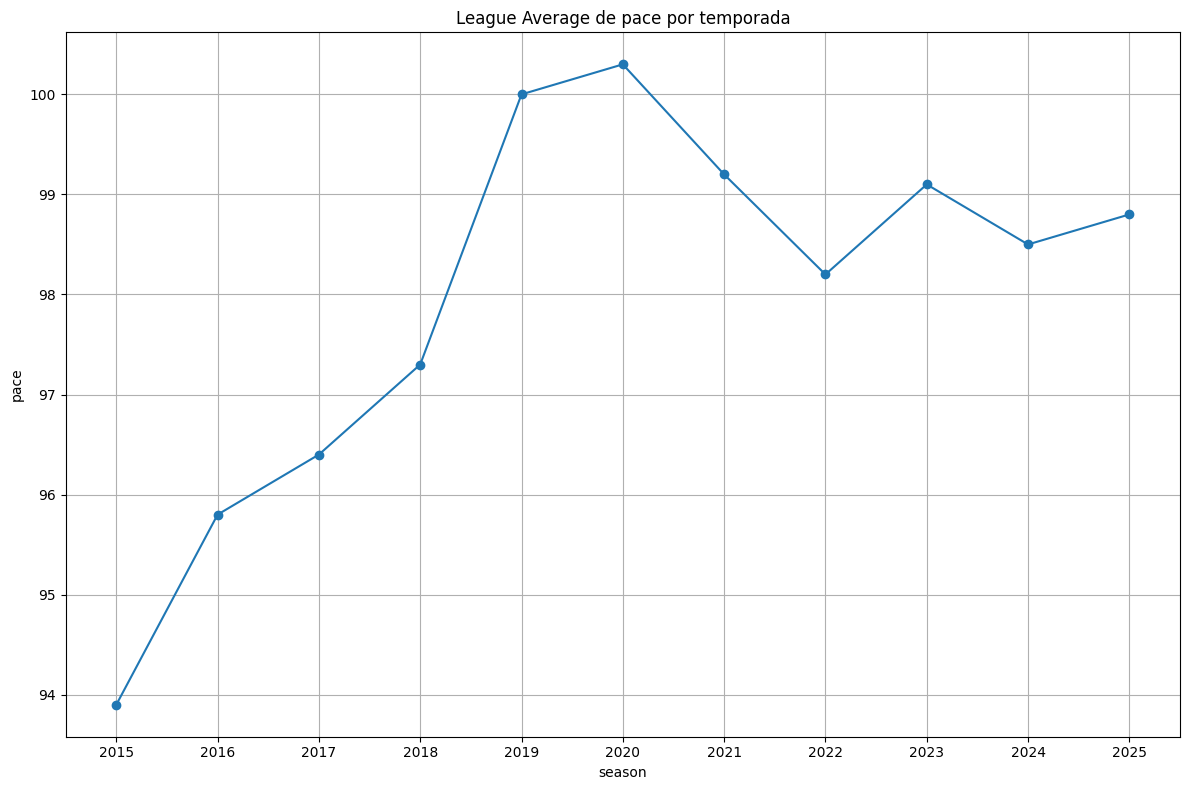

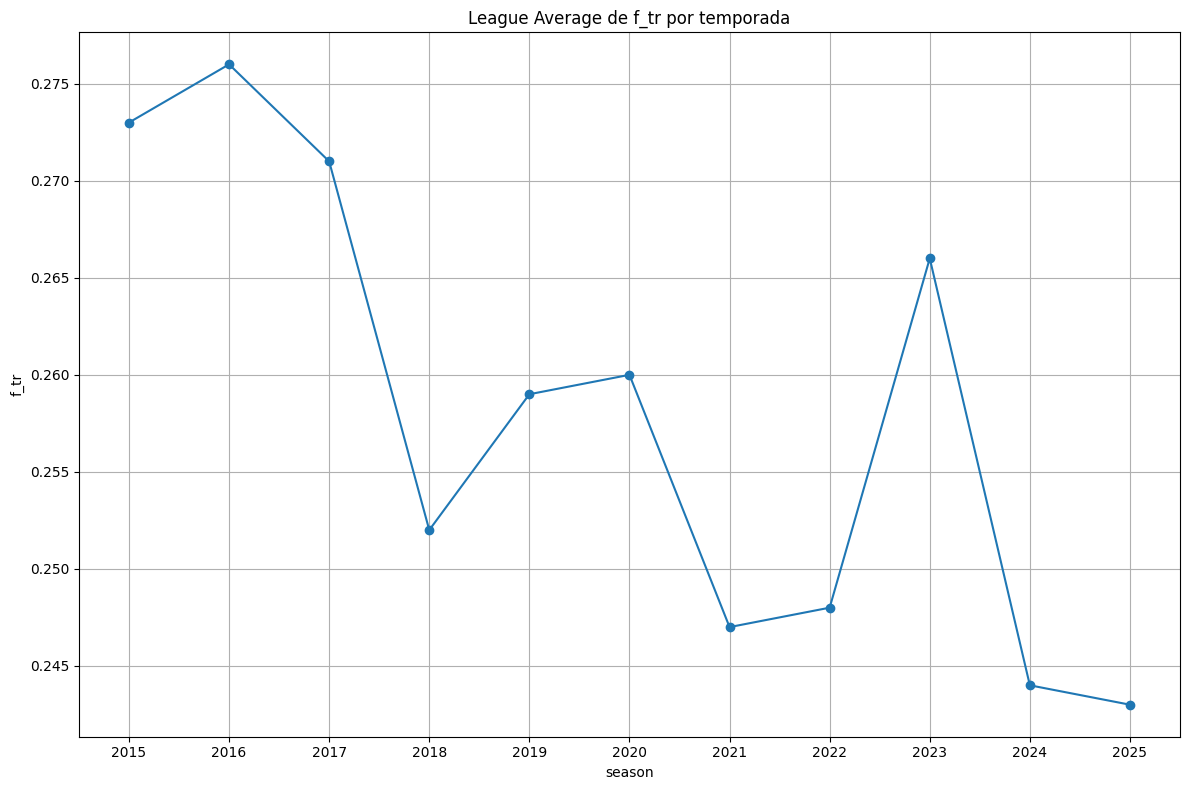

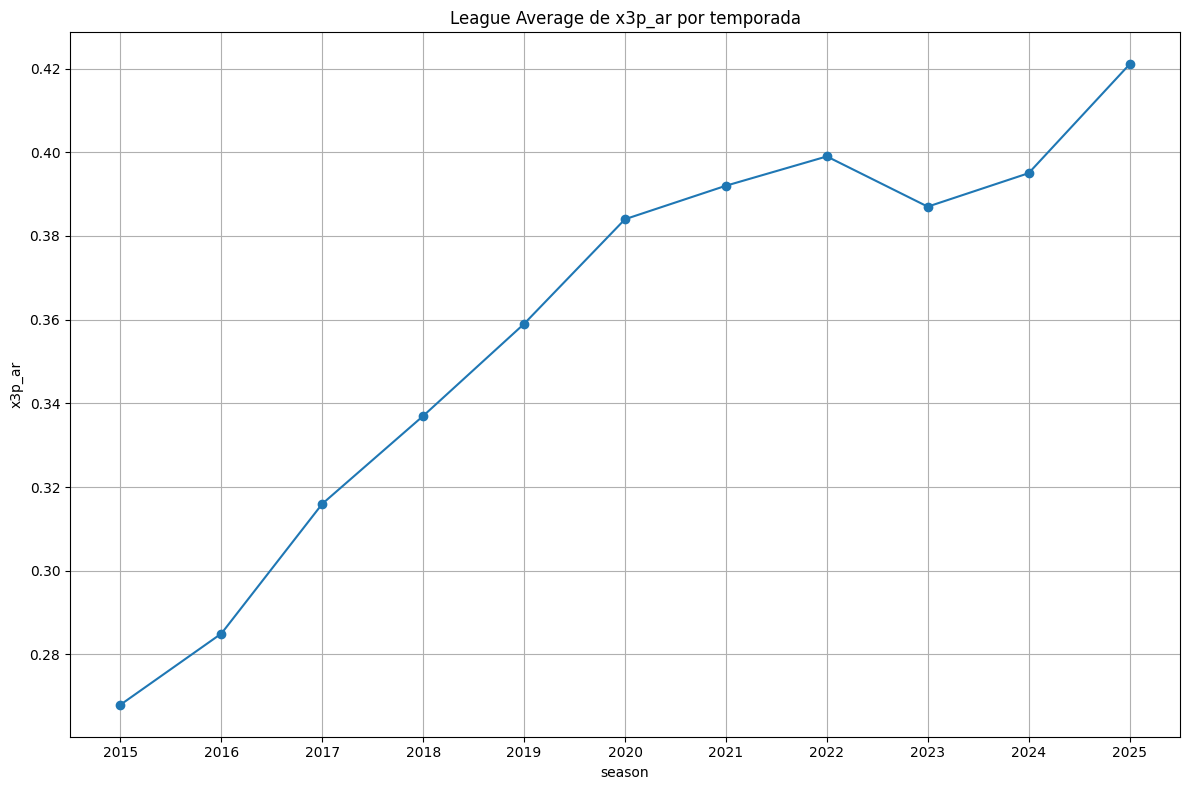

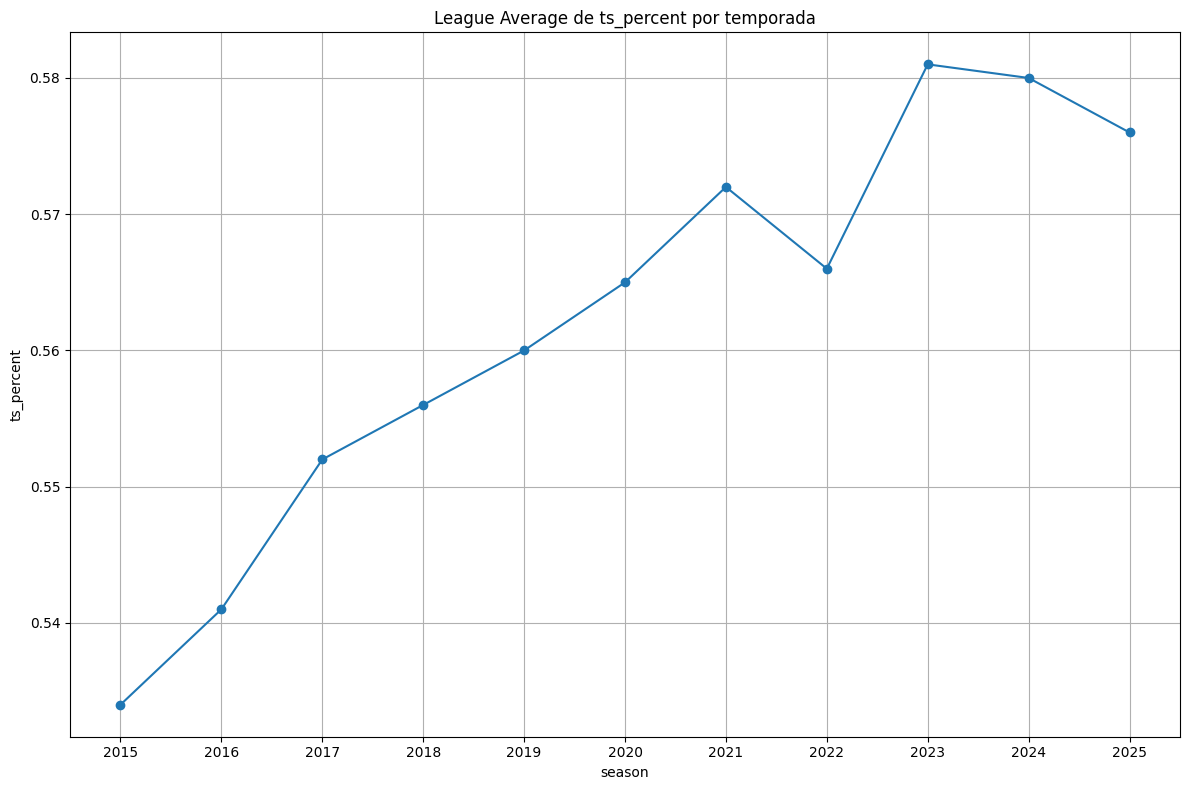

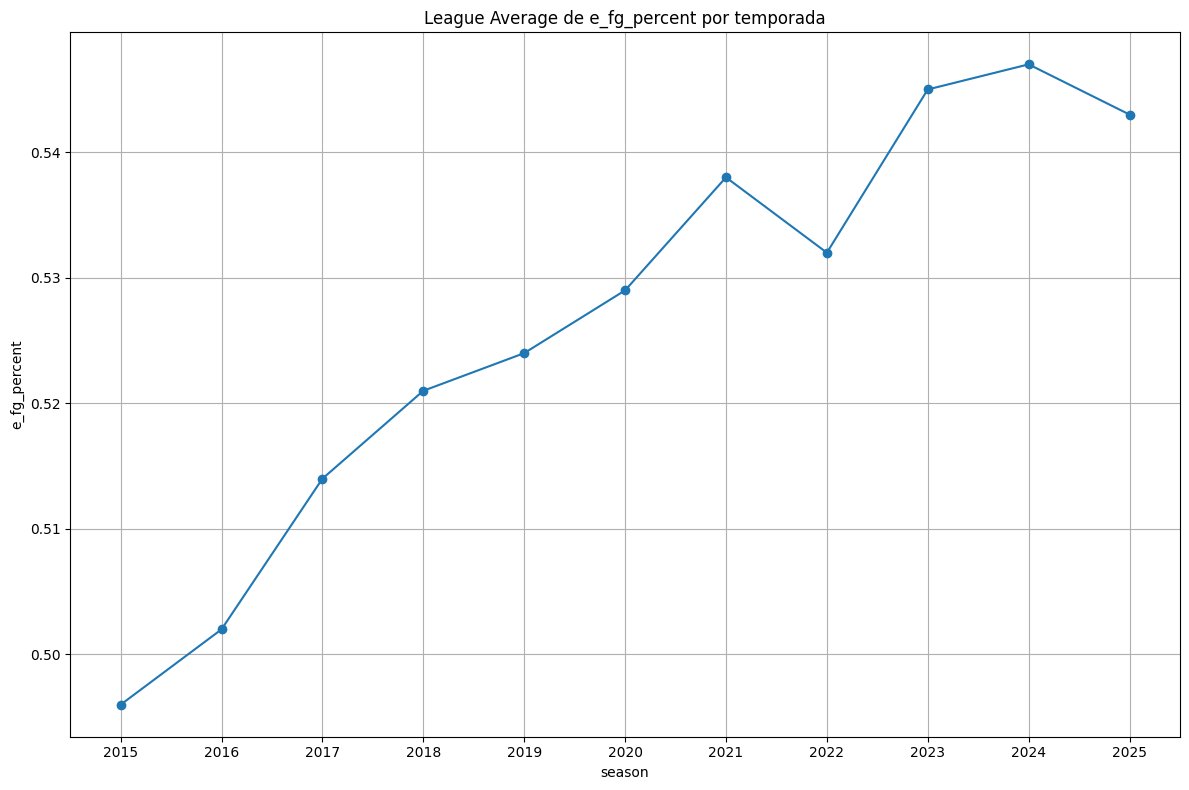

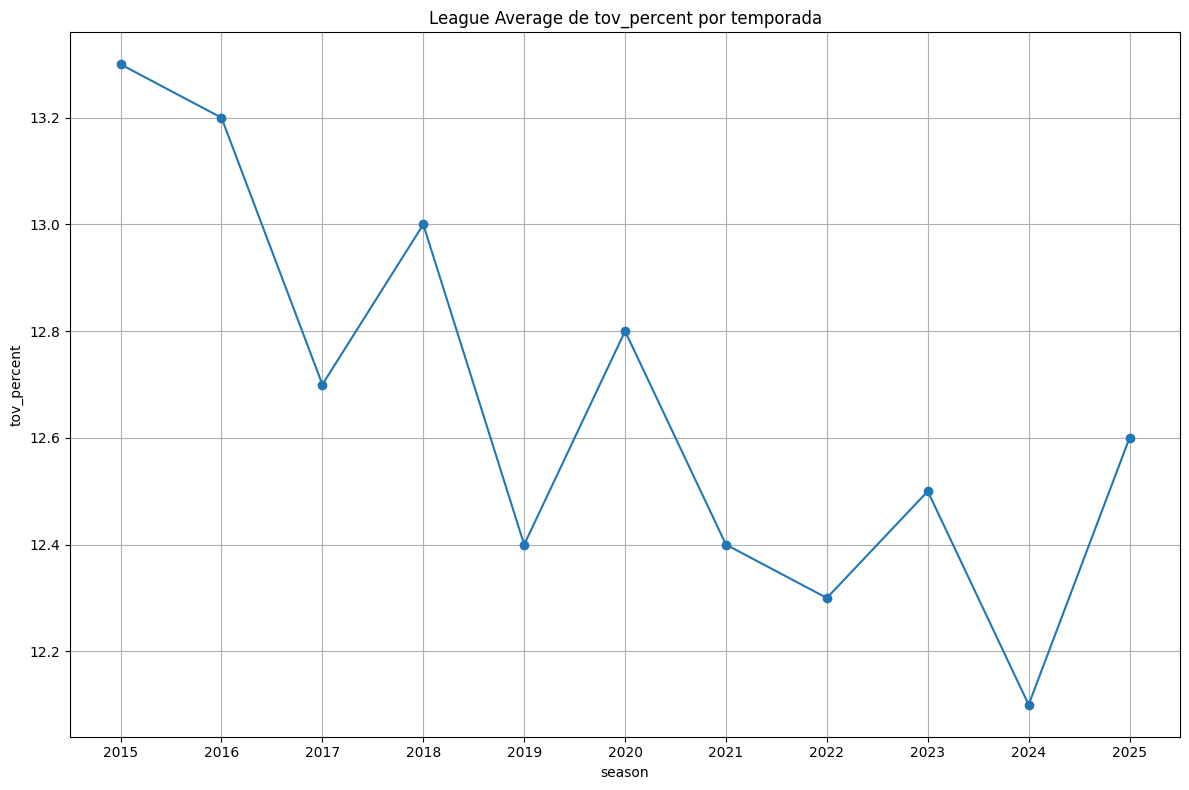

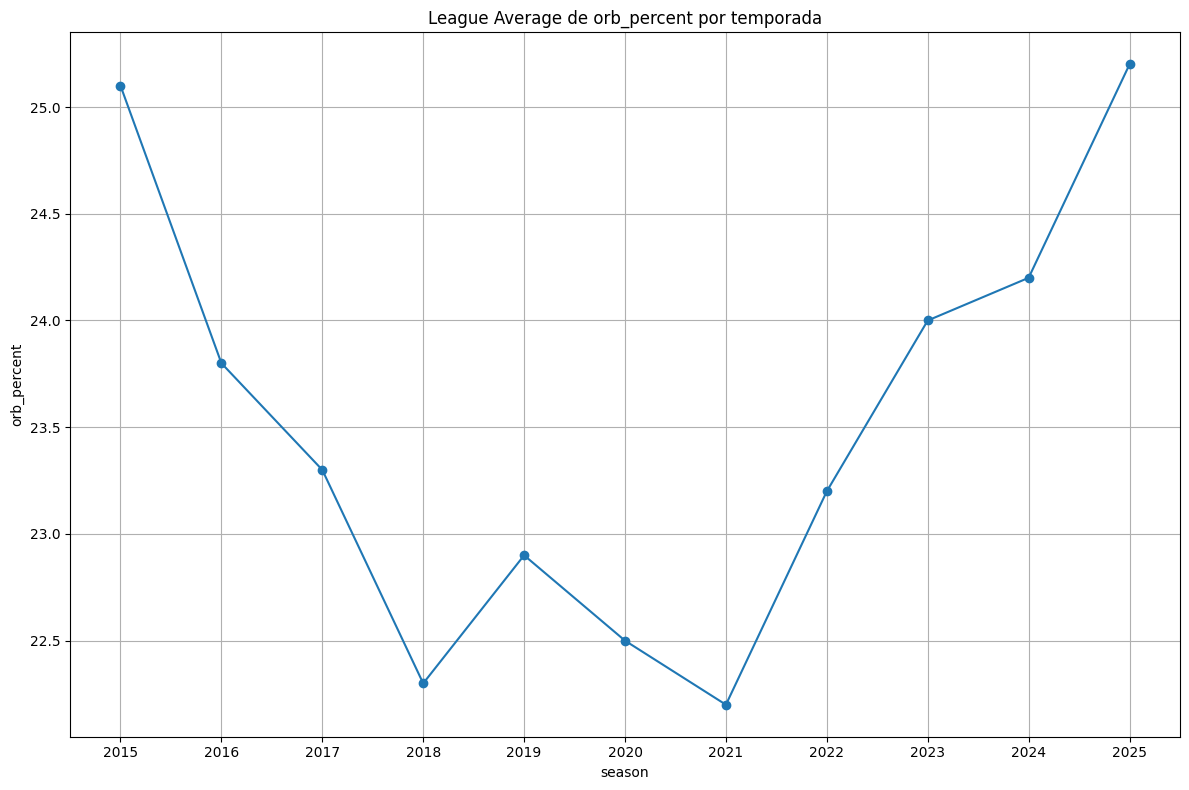

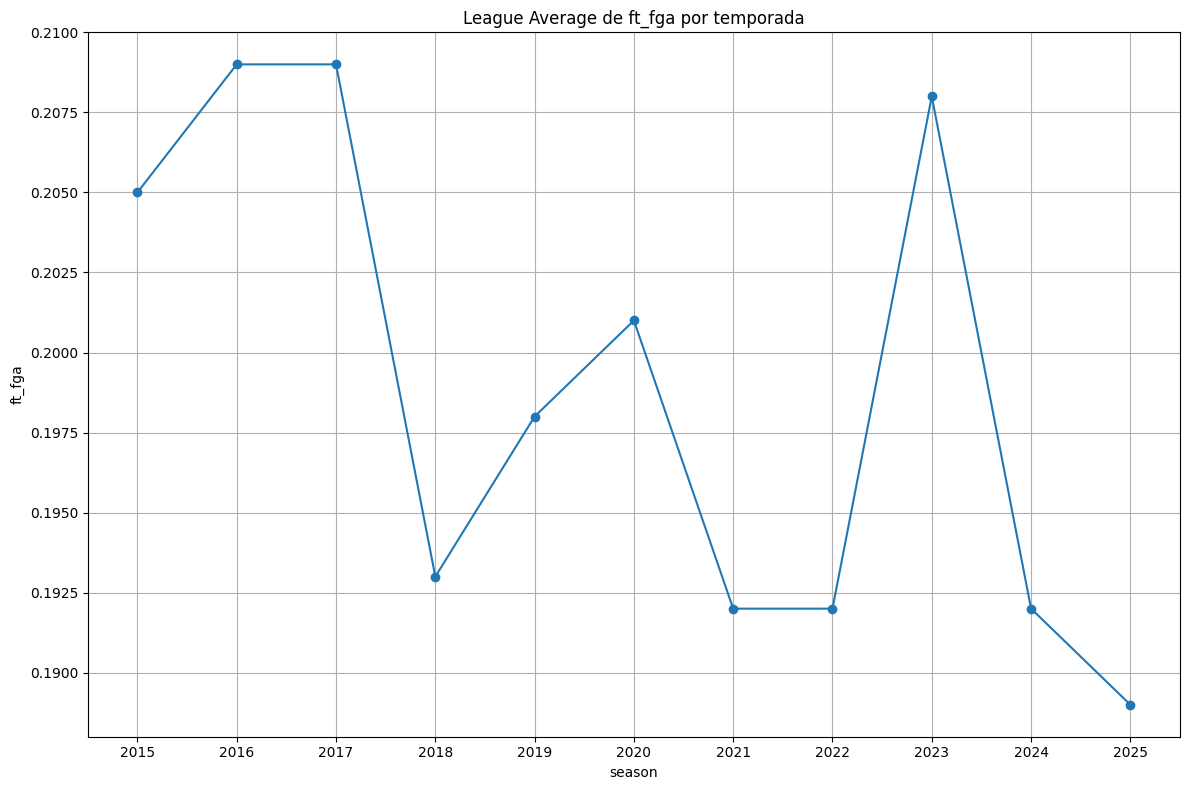

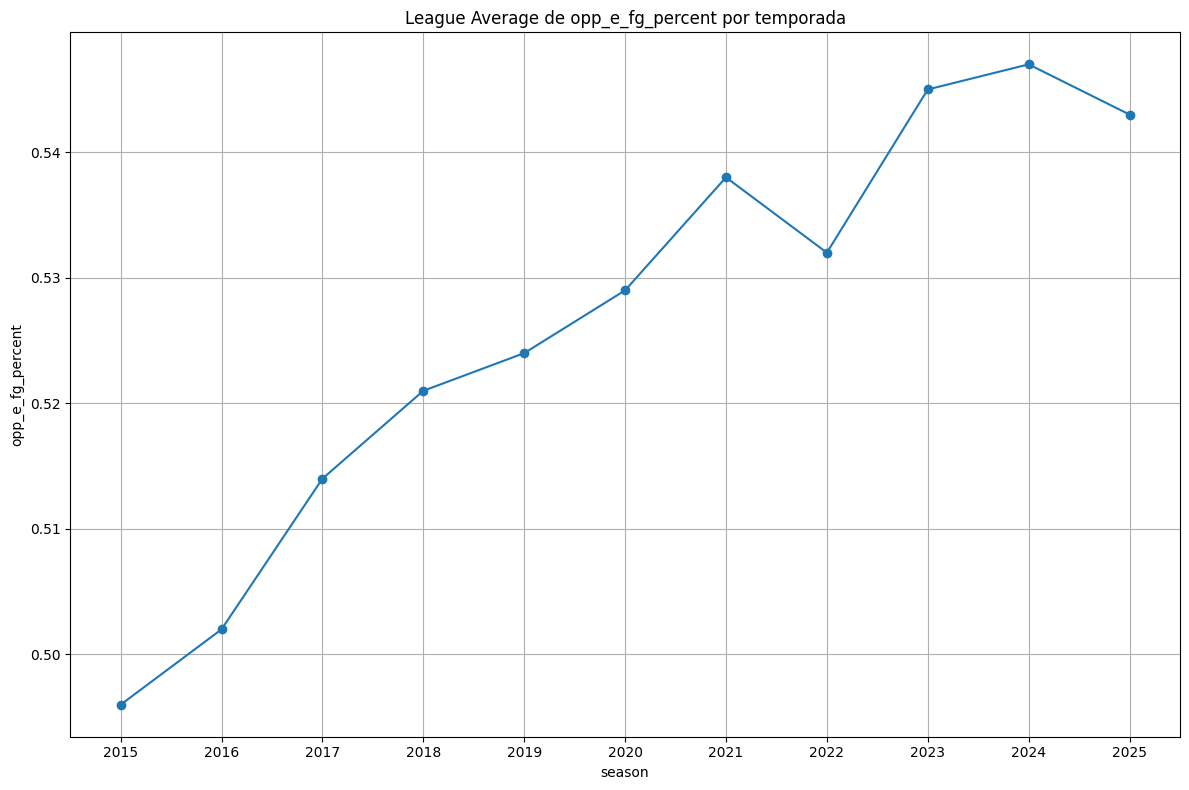

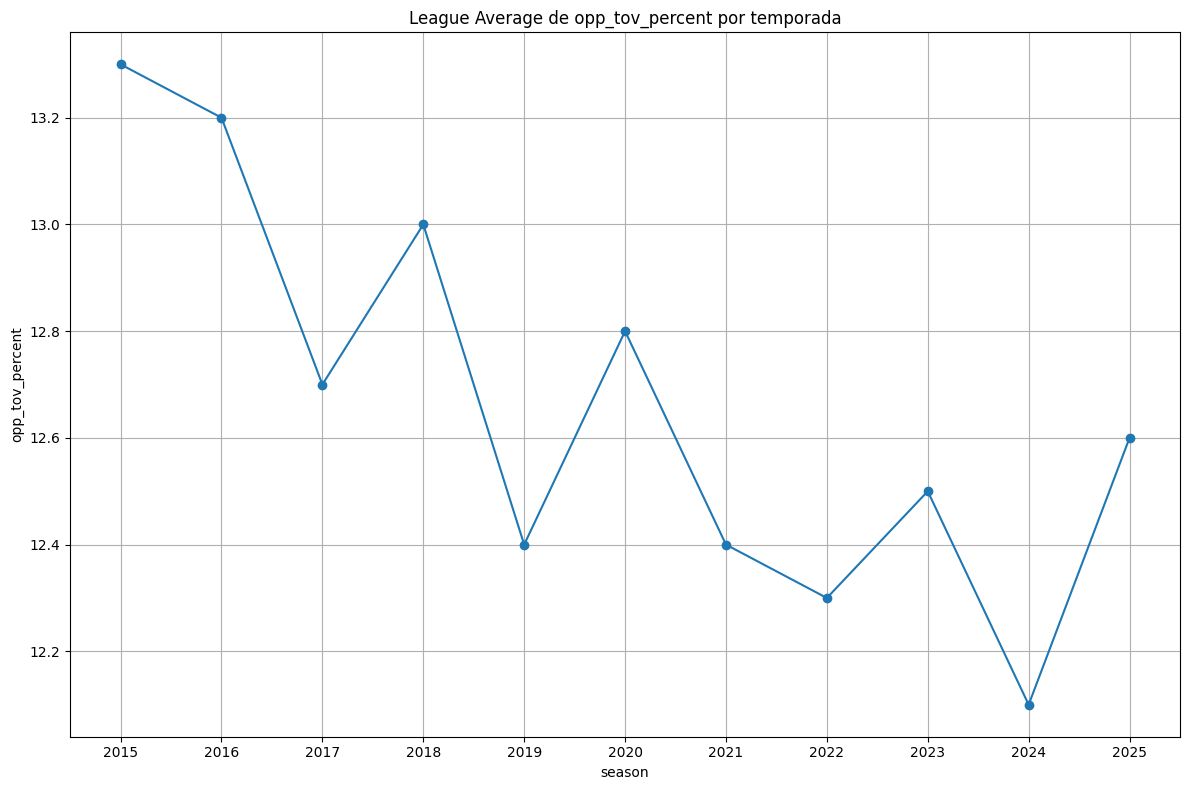

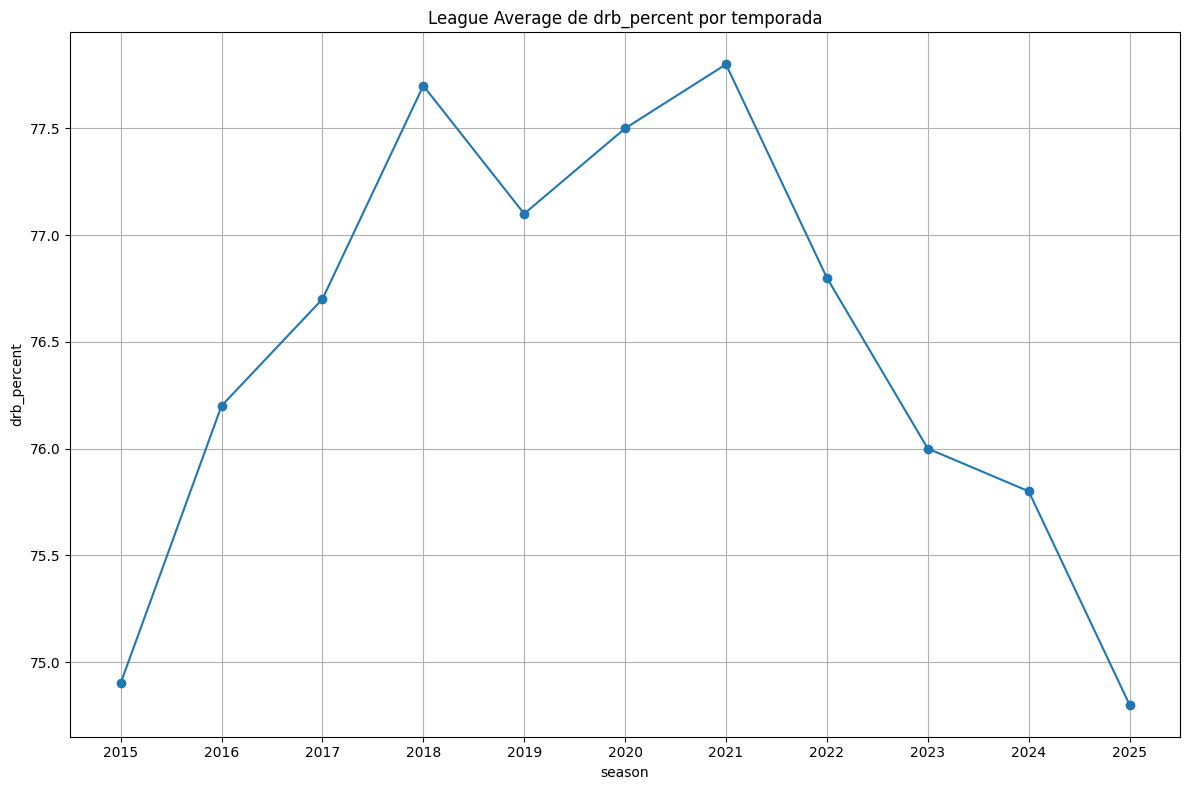

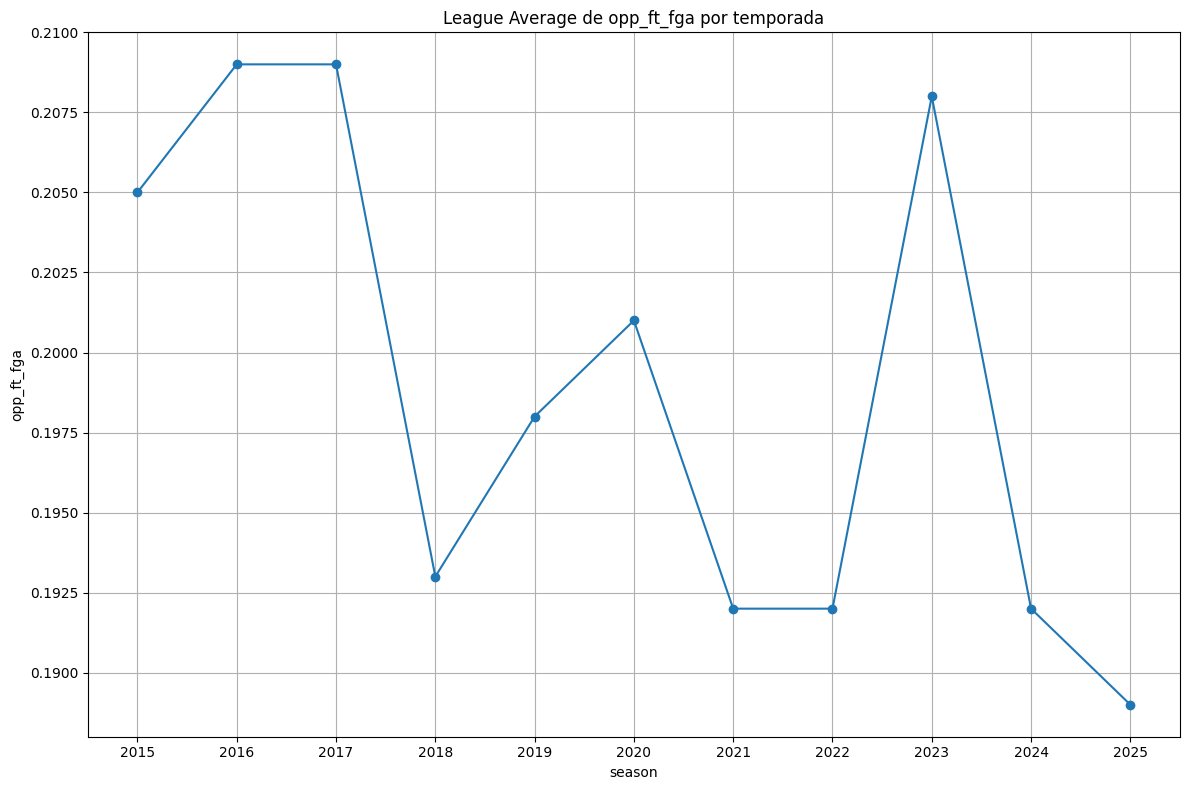

In [12]:
# 1) Filtrar solo los promedios de liga
league_avg = dataset[dataset["team"] == "League Average"].copy()

# 2) Asegurar tipo numérico y ordenar por temporada
league_avg["season"] = pd.to_numeric(league_avg["season"], errors="coerce")
league_avg["season"] = league_avg["season"].astype(int)
league_avg = league_avg.sort_values("season").reset_index(drop=True)

# 3) Tomar columnas numéricas (excluyendo 'season')
numeric_cols = league_avg.select_dtypes(include=["number"]).columns.drop("season")

# --- Excluir columnas específicas ---
exclude_cols = {"w", "l", "n_rtg", "mov", "pw", "pl", "sos", "srs"}
numeric_cols = numeric_cols.difference(exclude_cols, sort=False)

# 4) Graficarmos
for col in numeric_cols:
    plt.figure(figsize=(12, 8))
    plt.plot(league_avg["season"], league_avg[col], marker="o")
    plt.title(f"League Average de {col} por temporada")
    plt.xlabel("season")
    plt.ylabel(col)
    plt.xticks(league_avg["season"].unique())
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Segunda Entrega Proyecto IA


In [13]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

## Punto 2


In [14]:
dataset = dataset.drop(columns=['team'])
dataset['playoffs'] = dataset['playoffs'].astype(int)

y = dataset['n_rtg']
X = dataset.drop(columns=['n_rtg'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Escalar las características de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (272, 24)
Shape of X_test: (69, 24)
Shape of y_train: (272,)
Shape of y_test: (69,)


In [15]:

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_mae = mean_absolute_error(y_test, tree_pred)
print(f"Decision Tree MAE: {tree_mae:.3f}")

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
forest_mae = mean_absolute_error(y_test, forest_pred)
print(f"Random Forest MAE: {forest_mae:.3f}")

svm = SVR()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_mae = mean_absolute_error(y_test, svm_pred)
print(f"SVM MAE: {svm_mae:.3f}")

Decision Tree MAE: 0.148
Random Forest MAE: 0.100
SVM MAE: 0.539


## Punto 3

Depth: 1, MAE: 2.323
Depth: 11, MAE: 0.170
Depth: 21, MAE: 0.170
Depth: 31, MAE: 0.170
Depth: 41, MAE: 0.170
Depth: 51, MAE: 0.170
Depth: 61, MAE: 0.170
Depth: 71, MAE: 0.170
Depth: 81, MAE: 0.170
Depth: 91, MAE: 0.170


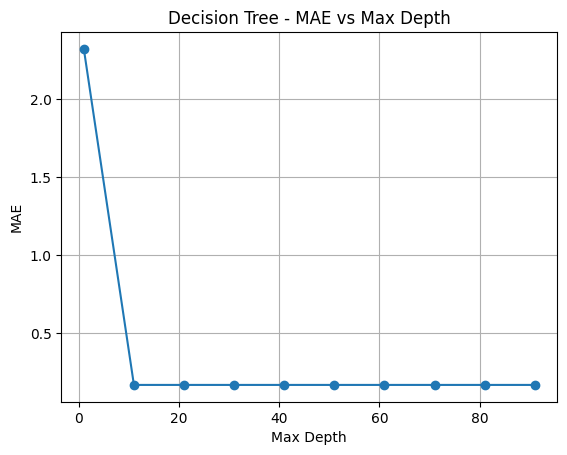

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

depth_values = range(1, 101, 10)  # {10, 100, Δ10}
mae_tree = []

for d in depth_values:
    model = DecisionTreeRegressor(max_depth=d, random_state=21)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mae_tree.append(mae)
    print(f"Depth: {d}, MAE: {mae:.3f}")


plt.plot(depth_values, mae_tree, marker='o')
plt.title("Decision Tree - MAE vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("MAE")
plt.grid(True)
plt.show()

Number of Estimators: 10, MAE: 0.130
Number of Estimators: 60, MAE: 0.111
Number of Estimators: 110, MAE: 0.106
Number of Estimators: 160, MAE: 0.104
Number of Estimators: 210, MAE: 0.103
Number of Estimators: 260, MAE: 0.103
Number of Estimators: 310, MAE: 0.104
Number of Estimators: 360, MAE: 0.104
Number of Estimators: 410, MAE: 0.105
Number of Estimators: 460, MAE: 0.104


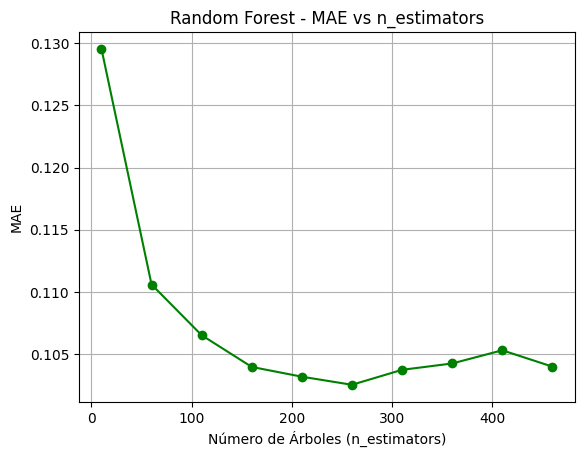

In [17]:
n_values = range(10, 501, 50)  # {10, 500, Δ50}
mae_forest = []

for n in n_values:
    model = RandomForestRegressor(n_estimators=n, random_state=21)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mae_forest.append(mae)
    print(f"Number of Estimators: {n}, MAE: {mae:.3f}")


plt.plot(n_values, mae_forest, marker='o', color='green')
plt.title("Random Forest - MAE vs n_estimators")
plt.xlabel("Número de Árboles (n_estimators)")
plt.ylabel("MAE")
plt.grid(True)
plt.show()

Kernel: linear, MAE: 0.056
Kernel: poly, MAE: 1.192
Kernel: rbf, MAE: 0.539


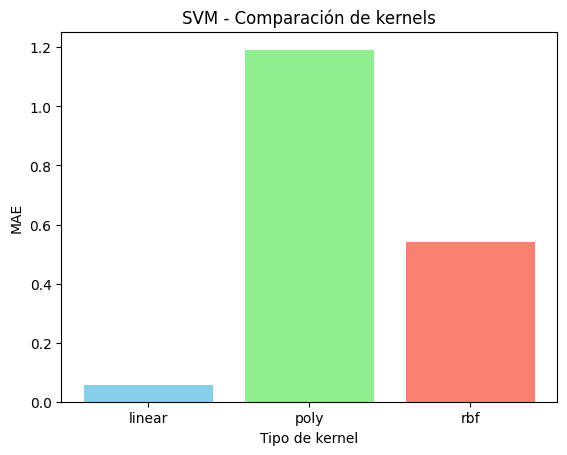

In [18]:
kernels = ['linear', 'poly', 'rbf']
mae_svm = []

for k in kernels:
    model = SVR(kernel=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mae_svm.append(mae)
    print(f"Kernel: {k}, MAE: {mae:.3f}")


# Gráfico de barras
plt.bar(kernels, mae_svm, color=['skyblue', 'lightgreen', 'salmon'])
plt.title("SVM - Comparación de kernels")
plt.xlabel("Tipo de kernel")
plt.ylabel("MAE")
plt.show()

## Punto 4

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

# Definir modelo
tree_cv = DecisionTreeRegressor(max_depth=5, random_state=21)


mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 5 folds
s = cross_val_score(tree_cv, X, y, cv=KFold(5, shuffle=True), scoring=mae_scorer)

# resultados
print(f"\nMAE por fold: {s}")
print(f"MAE promedio (mean): {s.mean():.3f}")
print(f"Desviación estándar (std): {s.std():.3f}")



MAE por fold: [-0.22091142 -0.27254647 -0.2912344  -0.26286373 -0.21999749]
MAE promedio (mean): -0.254
Desviación estándar (std): 0.028


# Tercera Entrega Proyecto IA


In [21]:
#@title Importaciones

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import random
import os
seed = 20252
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'   # Evita operaciones no deterministas

In [22]:
#@title Modelo 1

seed = 20252
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[X.shape[1]]),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='mse',
              metrics=['mse', 'mae'])
model1.fit(X_train, y_train, epochs=10, verbose = 1)

test_loss1, test_mse1, test_mae1= model1.evaluate(X_test, y_test)

print('Test mse:', test_mse1)
print('Test mae:', test_mae1)
print('Test loss:', test_loss1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 22.5132 - mae: 3.7443 - mse: 22.5132
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.0156 - mae: 2.5644 - mse: 11.0156
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.6121 - mae: 0.9920 - mse: 1.6121
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.3981 - mae: 0.9994 - mse: 1.3981
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5657 - mae: 0.5871 - mse: 0.5657
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2902 - mae: 0.4184 - mse: 0.2902
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2259 - mae: 0.3782 - mse: 0.2259
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1450 - mae: 0.2917 - mse: 0.1450
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1108 - mae: 0.2515 - mse: 0.1108
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0874 - mae: 0.2267 - mse: 0.0874
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1163 - mae: 0.2534 - mse: 0

In [28]:
#@title Modelo 2

seed = 20252
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[X.shape[1]]),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='mse',
              metrics=['mse', 'mae'])
model2.fit(X_train, y_train, epochs=10, verbose = 1)

test_loss2, test_mse2, test_mae2= model2.evaluate(X_test, y_test)

print('Test mse:', test_mse2)
print('Test mae:', test_mae2)
print('Test loss:', test_loss2)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 19.0808 - mae: 3.3836 - mse: 19.0808
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1011 - mae: 1.1998 - mse: 2.1011 
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7621 - mae: 0.6914 - mse: 0.7621 
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5999 - mae: 0.5808 - mse: 0.5999 
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3279 - mae: 0.4703 - mse: 0.3279 
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2353 - mae: 0.3651 - mse: 0.2353 
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1255 - mae: 0.2813 - mse: 0.1255 
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0925 - mae: 0.2332 - mse: 0.0925 
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0590 - mae: 0.1892 - mse: 0.0590
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0496 - mae: 0.1651 - mse: 0.0496 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0995 - mae: 0.2556 - mse: 0.0995 
Test ms

In [24]:
#@title Modelo 3

seed = 20252
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[X.shape[1]]),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

model3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='mse',
              metrics=['mse', 'mae'])
model3.fit(X_train, y_train, epochs=10, verbose = 1)

test_loss3, test_mse3, test_mae3= model3.evaluate(X_test, y_test)

print('Test mse:', test_mse3)
print('Test mae:', test_mae3)
print('Test loss:', test_loss3)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 21.5063 - mae: 3.6468 - mse: 21.5063
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1832 - mae: 2.3101 - mse: 9.1832   
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5146 - mae: 1.0011 - mse: 1.5146 
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3629 - mae: 0.9599 - mse: 1.3629 
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6951 - mae: 0.6272 - mse: 0.6951 
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3833 - mae: 0.4698 - mse: 0.3833 
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3396 - mae: 0.4460 - mse: 0.3396 
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2475 - mae: 0.3763 - mse: 0.2475 
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1987 - mae: 0.3376 - mse: 0.1987 
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1712 - mae: 0.3131 - mse: 0.1712 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2510 - mae: 0.4097 - mse: 0.2510 
Test 

In [34]:
#@title Modelo 4

seed = 20252
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[X.shape[1]]),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

model4.compile(optimizer=tf.keras.optimizers.Adam(),
               loss='mse',
               metrics=['mse', 'mae'])

model4.fit(X_train, y_train, epochs=10, verbose=1)

test_loss4, test_mse4, test_mae4 = model4.evaluate(X_test, y_test)

print('Test mse:', test_mse4)
print('Test mae:', test_mae4)
print('Test loss:', test_loss4)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 18.5832 - mae: 3.3223 - mse: 18.5832
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1136 - mae: 1.2106 - mse: 2.1136
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7515 - mae: 0.6655 - mse: 0.7515
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4485 - mae: 0.4880 - mse: 0.4485
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2499 - mae: 0.3817 - mse: 0.2499
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1832 - mae: 0.3019 - mse: 0.1832
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0989 - mae: 0.2493 - mse: 0.0989
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0733 - mae: 0.1969 - mse: 0.0733
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0492 - mae: 0.1765 - mse: 0.0492
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0384 - mae: 0.1466 - mse: 0.0384
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0589 - mae: 0.1887 - mse: 0.0

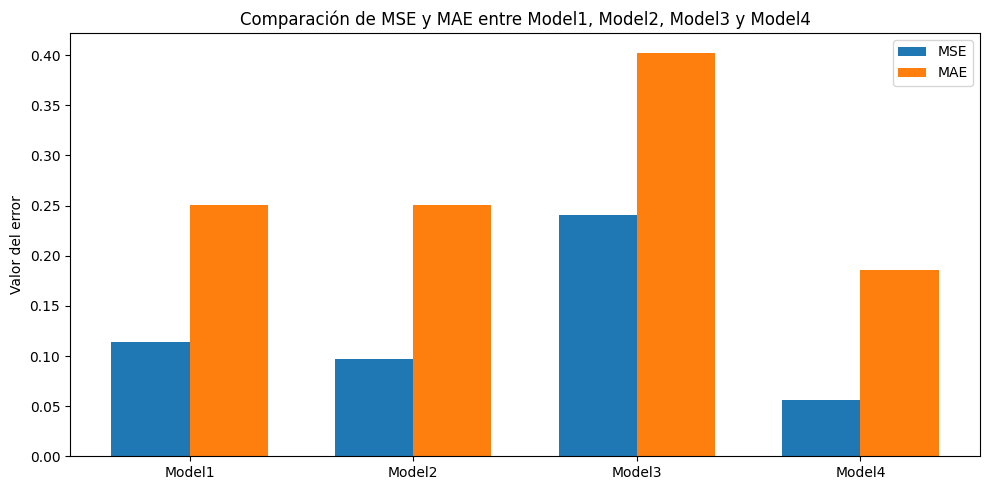

In [35]:
#@title Comparativa de resultados

import matplotlib.pyplot as plt
import numpy as np

# Nombres de los modelos
models = ['Model1', 'Model2', 'Model3', 'Model4']

# Listas con los valores de MSE y MAE
mse = [test_mse1, test_mse2, test_mse3, test_mse4]
mae = [test_mae1, test_mae2, test_mae3, test_mae4]

x = np.arange(len(models))      # posiciones en el eje X
width = 0.35                    # ancho de cada barra

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, mse, width, label='MSE')
plt.bar(x + width/2, mae, width, label='MAE')

plt.xticks(x, models)
plt.ylabel('Valor del error')
plt.title('Comparación de MSE y MAE entre Model1, Model2, Model3 y Model4')
plt.legend()
plt.tight_layout()
plt.show()
